In [1]:
import pandas as pd
import time
df = pd.read_csv('dataSetTia.csv', sep='|')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df

,anio,mes,localNestle,ciudadNestle,regionNestle,subcadenaNestle,unidadesVendidas,ventaNeta,totalSo,stock,totalStock
0,2023,2,MILAGRO COLON,MILAGRO,GUAYAS,TIA,3.0,14.94,10.050000,295.0,988.250000
1,2023,5,EL RECREO DURAN,DURAN,GUAYAS,TIA,4.0,19.92,13.400000,797.0,2669.950000
2,2023,1,ZAMORA,ZAMORA,SIERRA SUR,TIA,6.0,35.81,28.080000,488.0,2283.840000
3,2023,2,CHONGON,GUAYAQUIL,GUAYAS,TIA,26.0,179.37,121.680000,559.0,2616.120000
4,2023,2,EL MAESTRO,GUAYAQUIL,GUAYAS,TIA,19.0,122.36,88.920000,723.0,3383.640000
...,...,...,...,...,...,...,...,...,...,...,...
188485,2023,1,SUPERTIA BRISAS,GUAYAQUIL,GUAYAS,TIA,1.0,2.49,1.731480,31.0,53.675880
188486,2023,4,PTVJO AV MANABI,PORTOVIEJO,COSTA,TIA,2.0,3.98,2.677200,138.0,184.726800
188487,2023,6,LLANO GRANDE,QUITO,SIERRA NORTE,TIA,6.0,2.70,1.774080,56.0,16.558080
188488,2023,3,CENTRAL,DAULE,GUAYAS,TIA,1.0,0.58,0.491155,36.0,17.681586


<Axes: xlabel='totalSo', ylabel='Density'>

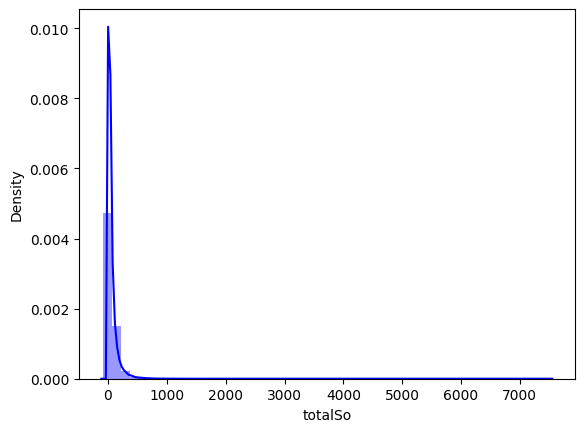

In [4]:
sns.distplot(df['totalSo'],color="blue")

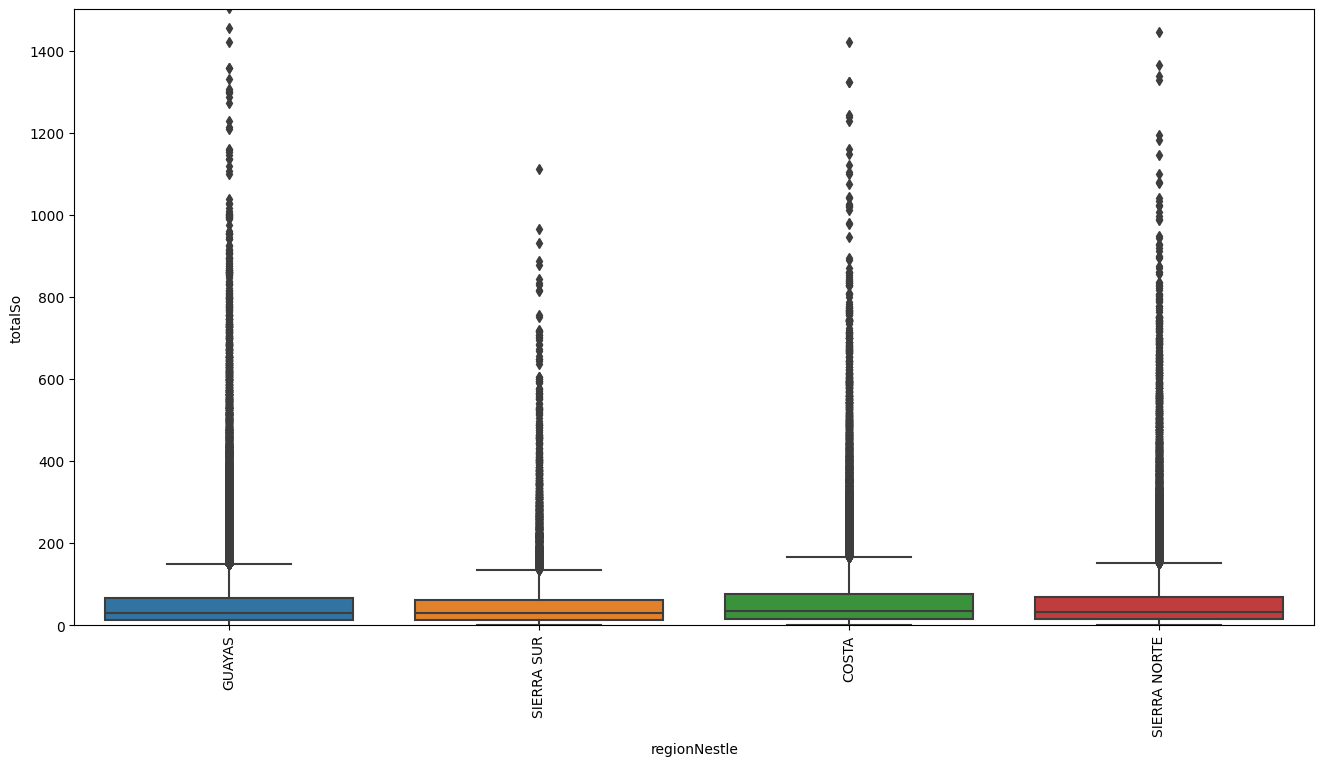

In [5]:
var = 'regionNestle'
data = pd.concat([df['totalSo'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="totalSo", data=data)
fig.axis(ymin=0, ymax=1500);
plt.xticks(rotation=90);

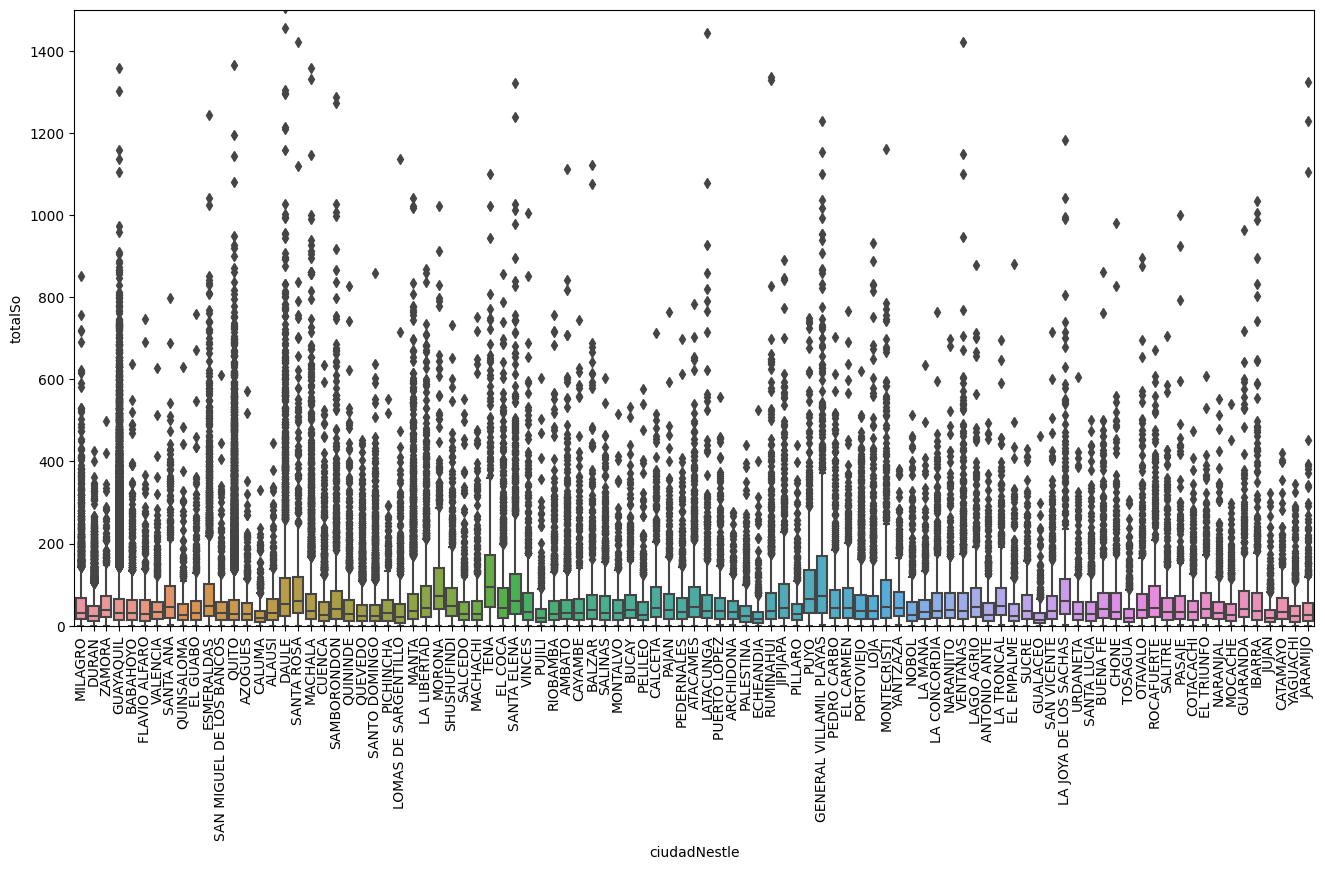

In [6]:
var = 'ciudadNestle'
data = pd.concat([df['totalSo'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="totalSo", data=data)
fig.axis(ymin=0, ymax=1500);
plt.xticks(rotation=90);

In [7]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [8]:
var_cuantitativas = [col for col in var_cuantitativas if col != 'anio']

df[var_cuantitativas].corr().style.background_gradient(cmap='coolwarm')

,mes,unidadesVendidas,ventaNeta,totalSo,stock,totalStock
mes,1.000000,0.052599,0.094477,0.099716,0.008117,0.022849
unidadesVendidas,0.052599,1.000000,0.761121,0.765171,0.577638,0.262593
ventaNeta,0.094477,0.761121,1.000000,0.984587,0.488755,0.471933
totalSo,0.099716,0.765171,0.984587,1.000000,0.455794,0.445920
stock,0.008117,0.577638,0.488755,0.455794,1.000000,0.696380
totalStock,0.022849,0.262593,0.471933,0.445920,0.696380,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [10]:
df1=df[['mes','localNestle','ciudadNestle','regionNestle','unidadesVendidas','ventaNeta','totalSo','stock','totalStock']]

In [11]:
df1

,mes,localNestle,ciudadNestle,regionNestle,unidadesVendidas,ventaNeta,totalSo,stock,totalStock
0,2,175,47,1,3.0,14.94,10.050000,295.0,988.250000
1,5,70,18,1,4.0,19.92,13.400000,797.0,2669.950000
2,1,284,96,3,6.0,35.81,28.080000,488.0,2283.840000
3,2,45,30,1,26.0,179.37,121.680000,559.0,2616.120000
4,2,69,30,1,19.0,122.36,88.920000,723.0,3383.640000
...,...,...,...,...,...,...,...,...,...
188485,1,264,30,1,1.0,2.49,1.731480,31.0,53.675880
188486,4,215,64,0,2.0,3.98,2.677200,138.0,184.726800
188487,6,117,71,2,6.0,2.70,1.774080,56.0,16.558080
188488,3,41,17,1,1.0,0.58,0.491155,36.0,17.681586


In [12]:
# Datos perdidos
df1.isna().sum()

mes                 0
localNestle         0
ciudadNestle        0
regionNestle        0
unidadesVendidas    0
ventaNeta           0
totalSo             0
stock               0
totalStock          0
dtype: int64

In [13]:
df1=df1.dropna()

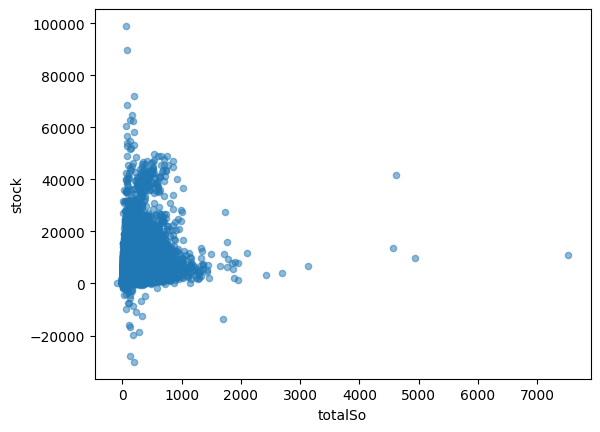

In [14]:
var = 'totalSo'
data = pd.concat([df1['stock'], df1[var]], axis=1)
data.plot.scatter(x=var, y='stock', alpha = 0.5);

In [15]:
data[data['stock']<0]

,stock,totalSo
1230,-11.0,9.215000
1712,-48.0,40.324554
1863,-15.0,2.861500
1947,-60.0,0.982730
2028,-252.0,13.578996
...,...,...
188276,-40.0,3.993240
188336,-6.0,8.219730
188337,-26.0,27.208500
188351,-22.0,9.110000


In [16]:
#X = df1[df1.columns.difference(['totalSo','ventaNeta','totalStock'])]
X = df1[df1.columns.difference(['totalSo','ventaNeta'])]
y = df1.totalSo

In [17]:
X

,ciudadNestle,localNestle,mes,regionNestle,stock,totalStock,unidadesVendidas
0,47,175,2,1,295.0,988.250000,3.0
1,18,70,5,1,797.0,2669.950000,4.0
2,96,284,1,3,488.0,2283.840000,6.0
3,30,45,2,1,559.0,2616.120000,26.0
4,30,69,2,1,723.0,3383.640000,19.0
...,...,...,...,...,...,...,...
188485,30,264,1,1,31.0,53.675880,1.0
188486,64,215,4,0,138.0,184.726800,2.0
188487,71,117,6,2,56.0,16.558080,6.0
188488,17,41,3,1,36.0,17.681586,1.0


In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state =123)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

inicio = time.time()

rf_model = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'squared_error',
            max_depth    = None,
            #max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )
rf_model.fit(X_train, y_train)

fin = time.time()

tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

Tiempo transcurrido: 31.064207315444946


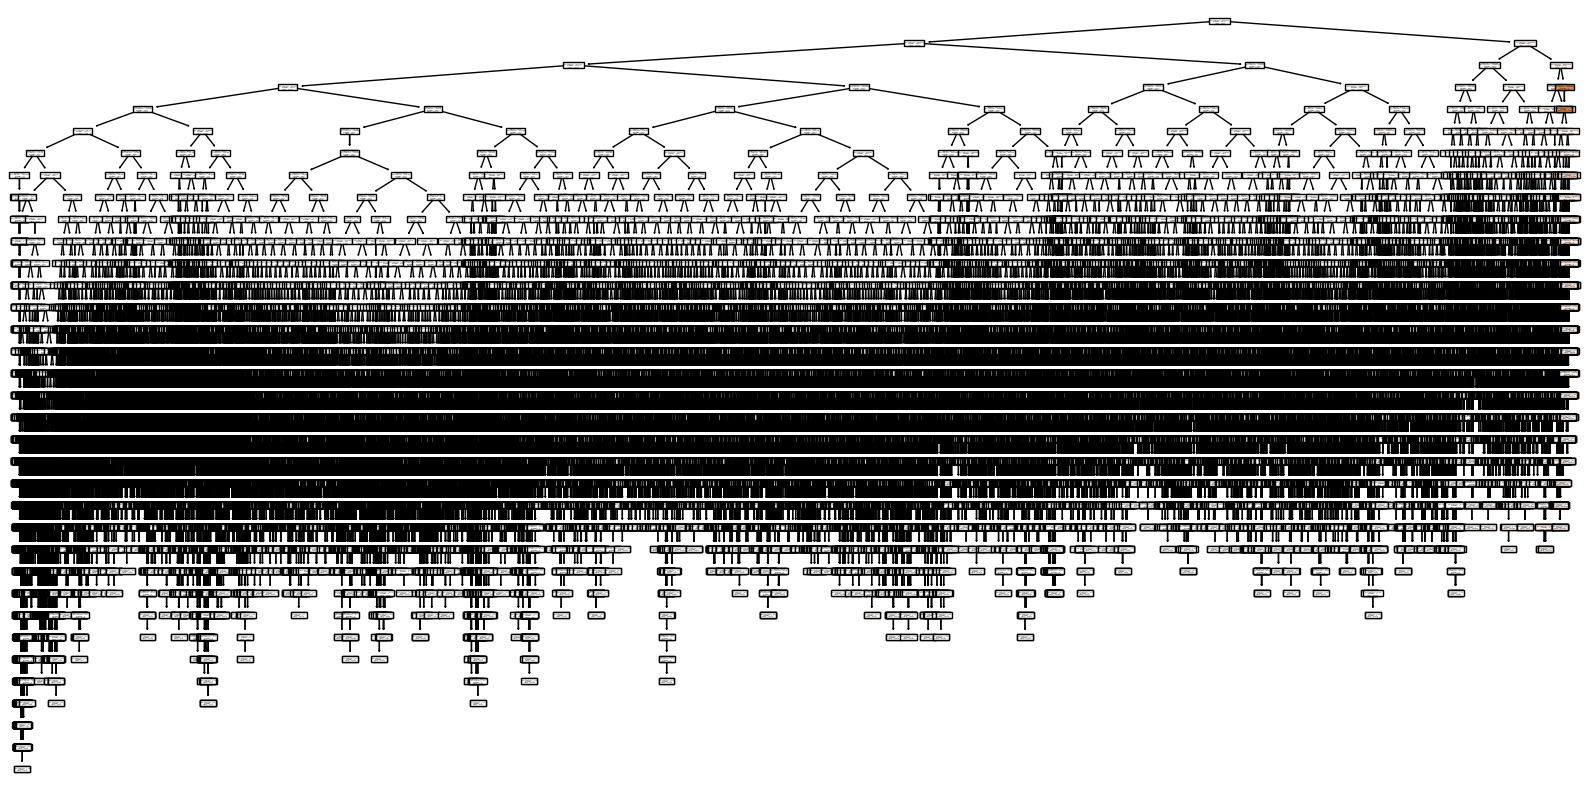

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=['ciudadNestle', 'localNestle', 'mes', 'regionNestle', 'stock',
       'totalStock', 'unidadesVendidas'])
plt.show()

In [22]:
y_pred = rf_model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 184.49437861442482


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R cuadrado:", r2)

R cuadrado: 0.9763130470446068


In [25]:
from sklearn.metrics import r2_score

Validacion Cruzada

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

Valor óptimo de n_estimators: 131
Tiempo transcurrido: 667.0081107616425


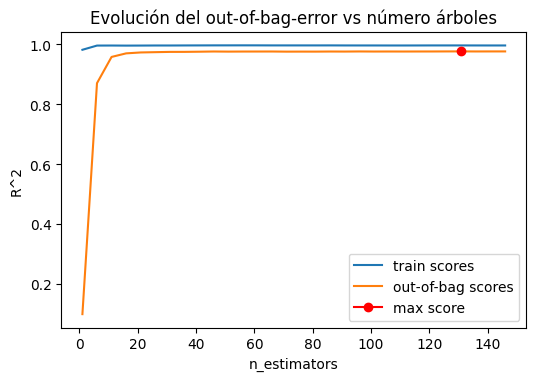

In [27]:
# Validación empleando el Out-of-Bag error
# ==============================================================================

inicio = time.time()

train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                #max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

fin = time.time()

tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

In [28]:
# Grid de hiperparámetros evaluados
# ==============================================================================

inicio = time.time()

param_grid = ParameterGrid(
                {'n_estimators': [20],
                 #'max_features': [5, 7, 10],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

fin = time.time()

tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

Modelo: {'max_depth': None, 'n_estimators': 20} ✓
Modelo: {'max_depth': 3, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'n_estimators': 20} ✓
Tiempo transcurrido: 17.065983057022095


In [29]:
resultados


,oob_r2,max_depth,n_estimators
0,0.972756,NaN,20.0
3,0.972209,20.0,20.0
2,0.954530,10.0,20.0
1,0.666940,3.0,20.0


In [30]:
inicio = time.time()

rf_model_fo = RandomForestRegressor(
            n_estimators = 20,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 'sqrt',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )
rf_model_fo.fit(X_train_std, y_train)

fin = time.time()

tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

Tiempo transcurrido: 2.379523277282715


In [31]:
y_pred_fo = rf_model_fo.predict(X_test_std)
r2_fo = r2_score(y_test, y_pred_fo)
print("R cuadrado:", r2_fo)

R cuadrado: 0.9479557753509619


In [32]:
ms1 = mean_squared_error(y_test, y_pred_fo)
print("Error cuadrático medio:", ms1)

Error cuadrático medio: 405.3652196285367


In [33]:
importancia = permutation_importance(
                estimator    = rf_model_fo,
                X            = X_train_std,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
6,109.536461,0.219626,unidadesVendidas
5,72.343578,0.277579,totalStock
4,71.850613,0.330532,stock
2,12.653486,0.312467,mes
1,6.673672,0.622367,localNestle
0,4.785182,0.584879,ciudadNestle
3,3.076414,0.208982,regionNestle


Redes Neuronales

In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [35]:
oculta1=tf.keras.layers.Dense(units=10,input_shape=(7,))
oculta2=tf.keras.layers.Dense(units=6,activation='relu')
salida= tf.keras.layers.Dense(units=1,activation='relu')
modelo= tf.keras.Sequential([oculta1,oculta2,salida])

In [36]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [37]:
inicio = time.time()
historial = modelo.fit(X_train_std, y_train, epochs=50, verbose=True)

fin = time.time()

tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

Epoch 1/50
4713/4713 [==============================] - 4s 711us/step - loss: 3744.1155
Epoch 2/50
4713/4713 [==============================] - 3s 669us/step - loss: 2241.0166
Epoch 3/50
4713/4713 [==============================] - 3s 674us/step - loss: 2960.8506
Epoch 4/50
4713/4713 [==============================] - 3s 705us/step - loss: 3507.6528
Epoch 5/50
4713/4713 [==============================] - 3s 659us/step - loss: 2560.7078
Epoch 6/50
4713/4713 [==============================] - 3s 681us/step - loss: 2273.7791
Epoch 7/50
4713/4713 [==============================] - 3s 677us/step - loss: 2332.1357
Epoch 8/50
4713/4713 [==============================] - 3s 666us/step - loss: 2139.4084
Epoch 9/50
4713/4713 [==============================] - 3s 684us/step - loss: 2066.8384
Epoch 10/50
4713/4713 [==============================] - 3s 721us/step - loss: 2108.2227
Epoch 11/50
4713/4713 [==============================] - 3s 681us/step - loss: 2054.1760
Epoch 12/50
4713/4713 [=======

In [38]:
prediccionesRN = modelo.predict(X_test_std)
prediccionesRN = abs(prediccionesRN)

1179/1179 [==============================] - 1s 511us/step


In [39]:
mseN = mean_squared_error(y_test, prediccionesRN)
print("Error cuadrático medio:", mseN)

r2N = r2_score(y_test, prediccionesRN)
print("R cuadrado:", r2N)

Error cuadrático medio: 2328.8136359848577
R cuadrado: 0.7010071556015487


In [40]:
def build_clf(unit,unit1):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=unit, input_shape=(7,),activation='relu'))
    ann.add(tf.keras.layers.Dense(units=unit1, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='relu'))
    ann.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error', metrics = ['accuracy'])
    return ann

In [41]:
inicio = time.time()

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
model=KerasRegressor(build_fn=build_clf)
params={'batch_size':[20, 50, 25, 32], 
        'nb_epoch':[25, 50, 100],
        'unit':[5,6, 10, 11, 15],
        'unit1':[5,6, 10, 11, 15]   
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X_train_std, y_train)
best_params=gs.best_params_
accuracy=gs.best_score_

fin = time.time()

tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

4713/4713 [==============================] - 6s 1ms/step - loss: 1926.1864 - accuracy: 3.3158e-05
Tiempo transcurrido: 13674.562799215317


In [42]:
best_params

{'batch_size': 32, 'nb_epoch': 100, 'unit': 15, 'unit1': 5}

In [43]:
r2N1 = 0
 
inicio = time.time()
batch=25
Epoch=25
Nodos=15
Nodos1=10

oculta1=tf.keras.layers.Dense(units=Nodos,input_shape=(7,))
oculta2=tf.keras.layers.Dense(units=Nodos1,activation='relu')
salida= tf.keras.layers.Dense(units=1,activation='relu')
modelo= tf.keras.Sequential([oculta1,oculta2,salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)
historial = modelo.fit(X_train_std, y_train,batch_size=batch, epochs=Epoch, verbose=True)

prediccionesRN1 = modelo.predict(X_test_std)
prediccionesRN1 = abs(prediccionesRN1)
mseN1 = mean_squared_error(y_test, prediccionesRN1)
print("Error cuadrático medio:", mseN1)
r2N1 = r2_score(y_test, prediccionesRN1)
print("R cuadrado:", r2N1)
    
fin = time.time()   
tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)
    
print("El bucle ha finalizado con un R^2 de:", r2N1)


Epoch 1/25
6032/6032 [==============================] - 4s 649us/step - loss: 7987.0005
Epoch 2/25
6032/6032 [==============================] - 5s 807us/step - loss: 12135.7607
Epoch 3/25
6032/6032 [==============================] - 4s 724us/step - loss: 12135.7793
Epoch 4/25
6032/6032 [==============================] - 4s 708us/step - loss: 12135.7559
Epoch 5/25
6032/6032 [==============================] - 4s 676us/step - loss: 12135.7666
Epoch 6/25
6032/6032 [==============================] - 5s 813us/step - loss: 12135.7559
Epoch 7/25
6032/6032 [==============================] - 5s 878us/step - loss: 12135.7354
Epoch 8/25
6032/6032 [==============================] - 6s 921us/step - loss: 12135.7529
Epoch 9/25
6032/6032 [==============================] - 5s 797us/step - loss: 12135.7666
Epoch 10/25
6032/6032 [==============================] - 4s 684us/step - loss: 12135.7861
Epoch 11/25
6032/6032 [==============================] - 5s 767us/step - loss: 12135.8086
Epoch 12/25
6032/603

In [44]:
prediccionesRN1 = modelo.predict(X_test_std)
prediccionesRN1 = abs(prediccionesRN1)
mseN1 = mean_squared_error(y_test, prediccionesRN1)
print("Error cuadrático medio:", mseN1)
r2N1 = r2_score(y_test, prediccionesRN1)
print("R cuadrado:", r2N1)

1179/1179 [==============================] - 1s 436us/step
Error cuadrático medio: 1455.000000371314
R cuadrado: 0.8131947606332224


In [45]:
inicio = time.time()
modelo.fit(X_train_std, y_train,batch_size=batch, epochs=Epoch, verbose=True)
fin = time.time()   
tiempo = fin - inicio
print("Tiempo transcurrido:", tiempo)

Epoch 1/25
6032/6032 [==============================] - 4s 592us/step - loss: 2031.7086
Epoch 2/25
6032/6032 [==============================] - 4s 640us/step - loss: 2965.8933
Epoch 3/25
6032/6032 [==============================] - 4s 612us/step - loss: 1925.1385
Epoch 4/25
6032/6032 [==============================] - 4s 639us/step - loss: 1988.7843
Epoch 5/25
6032/6032 [==============================] - 4s 613us/step - loss: 2109.5115
Epoch 6/25
6032/6032 [==============================] - 4s 612us/step - loss: 3477.3857
Epoch 7/25
6032/6032 [==============================] - 4s 632us/step - loss: 3069.6882
Epoch 8/25
6032/6032 [==============================] - 4s 643us/step - loss: 2863.2017
Epoch 9/25
6032/6032 [==============================] - 4s 612us/step - loss: 2308.2534
Epoch 10/25
6032/6032 [==============================] - 4s 601us/step - loss: 2093.1575
Epoch 11/25
6032/6032 [==============================] - 4s 584us/step - loss: 2403.9756
Epoch 12/25
6032/6032 [=======